# 副本与视图
在Numpy中，尤其是在做数组运算或数组操作时，返回结果不是数组的 ***副本*** 就是 ***视图***

在Numpy中，所有赋值运算不会为数组和数组中的任何元素创建副本
- `numpy.ndarry.copy()`函数创建一个副本，对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置

In [2]:
import numpy as np

x = np.array([1, 2, 3, 4, 5 ,6])
y = x       # y是x的一个视图
y[0] = -1
print(x, y)
# [-1  2  3  4  5  6] [-1  2  3  4  5  6]

x = np.array([1, 2, 3, 4, 5])
y = x.copy() # y是x的一个副本
y[0] = -1
print(x, y)
# [1 2 3 4 5] [-1  2  3  4  5]

[-1  2  3  4  5  6] [-1  2  3  4  5  6]
[1 2 3 4 5] [-1  2  3  4  5]


数组切片操作返回的对象只是原数组的视图

In [4]:
import numpy as np
x = np.fromfunction(lambda i, j : 10 * (i + 1) + j, (5, 5), dtype = int)
y = x
y[::2, :3:2] = -1 # 一维从头到尾隔两个，二维从头到2，隔两个
print(x, y, sep = '\n')
# [[-1 11 -1 13 14]
#  [20 21 22 23 24]
#  [-1 31 -1 33 34]
#  [40 41 42 43 44]
#  [-1 51 -1 53 54]]

# [[-1 11 -1 13 14]
#  [20 21 22 23 24]
#  [-1 31 -1 33 34]
#  [40 41 42 43 44]
#  [-1 51 -1 53 54]]
x = np.fromfunction(lambda i, j : 10*(i+1)+j+1, (5, 5), dtype = int)
y = x.copy()
y[::2, ::3] = 0
print(x, y, sep = '\n')
# [[11 12 13 14 15]
#  [21 22 23 24 25]
#  [31 32 33 34 35]
#  [41 42 43 44 45]
#  [51 52 53 54 55]]

# [[ 0 12 13  0 15]
#  [21 22 23 24 25]
#  [ 0 32 33  0 35]
#  [41 42 43 44 45]
#  [ 0 52 53  0 55]]

[[-1 11 -1 13 14]
 [20 21 22 23 24]
 [-1 31 -1 33 34]
 [40 41 42 43 44]
 [-1 51 -1 53 54]]
[[-1 11 -1 13 14]
 [20 21 22 23 24]
 [-1 31 -1 33 34]
 [40 41 42 43 44]
 [-1 51 -1 53 54]]
[[11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]
 [51 52 53 54 55]]
[[ 0 12 13  0 15]
 [21 22 23 24 25]
 [ 0 32 33  0 35]
 [41 42 43 44 45]
 [ 0 52 53  0 55]]


# 索引与切片
数组索引机制指的是用方括号`[]`加序号的形式引用单个数组元素，它的用处很多，比如抽取元素，选取数组的几个元素，甚至为其赋一个新值
## 整数索引

In [5]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(x[2])  # 3

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
print(x[2])  # [21 22 23 24 25]
print(x[2][1])  # 22
print(x[2, 1])  # 22

3
[21 22 23 24 25]
22
22


## 切片索引

切片操作是指抽取数组的一部分元素生成新数组。对***Python列表***进行切片操作得到的数组是原数组的***副本***，而对***Numpy***数据进行切片操作得到的数组则是***指向相同缓冲区的视图***

如果想抽取或查看数组的一部分，必须使用切片语法，也就是，把几个用冒号`（ start:stop:step ）`隔开的数字置于方括号内。

为了更好地理解切片语法，还应该了解不明确指明起始和结束位置的情况。如省去第一个数字，numpy 会认为第一个数字是0；如省去第二个数字，numpy 则会认为第二个数字是数组的最大索引值；如省去最后一个数字，它将会被理解为1，也就是抽取所有元素而不再考虑间隔。

【例】对一维数组

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(x[0:2])  # [1 2]
#用下标0~5,以2为步长选取数组
print(x[1:5:2])  # [2 4]
print(x[2:])  # [3 4 5 6 7 8]
print(x[:2])  # [1 2]
print(x[-2:])  # [7 8]
print(x[:-2])  # [1 2 3 4 5 6]
print(x[:])  # [1 2 3 4 5 6 7 8]
#利用负数下标翻转数组
print(x[::-1]) # [8 7 6 5 4 3 2 1]

[1 2]
[2 4]
[3 4 5 6 7 8]
[1 2]
[7 8]
[1 2 3 4 5 6]
[1 2 3 4 5 6 7 8]
[8 7 6 5 4 3 2 1]


In [ ]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
print(x[0:2])
# [[11 12 13 14 15]
#  [16 17 18 19 20]]

print(x[1:5:2])
# [[16 17 18 19 20]
#  [26 27 28 29 30]]

print(x[2:])
# [[21 22 23 24 25]
#  [26 27 28 29 30]
#  [31 32 33 34 35]]

print(x[:2])
# [[11 12 13 14 15]
#  [16 17 18 19 20]]

print(x[-2:])
# [[26 27 28 29 30]
#  [31 32 33 34 35]]

print(x[:-2])
# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]]

print(x[:])
# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]
#  [26 27 28 29 30]
#  [31 32 33 34 35]]


print(x[2, :])  # [21 22 23 24 25]
print(x[:, 2])  # [13 18 23 28 33]
print(x[0, 1:4])  # [12 13 14]
print(x[1:4, 0])  # [16 21 26]
print(x[1:3, 2:4])
# [[18 19]
#  [23 24]]

print(x[:, :])
# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]
#  [26 27 28 29 30]
#  [31 32 33 34 35]]

print(x[::2, ::2])
# [[11 13 15]
#  [21 23 25]
#  [31 33 35]]

print(x[::-1, :])
# [[31 32 33 34 35]
#  [26 27 28 29 30]
#  [21 22 23 24 25]
#  [16 17 18 19 20]
#  [11 12 13 14 15]]

print(x[:, ::-1])
# [[15 14 13 12 11]
#  [20 19 18 17 16]
#  [25 24 23 22 21]
#  [30 29 28 27 26]
#  [35 34 33 32 31]]

通过对每个以逗号分隔的维度执行单独的切片，你可以对多维数组进行切片。因此，对于二维数组，我们的第一片定义了行的切片，第二片定义了列的切片

## dots索引

Numpy允许使用`...`表示足够多的冒号来构建完整的索引列表
比如，如果`x`是5维数组：
- x[1, 2,...]  == x[1,2,:,:,:]
- x[...,3]     == x[:, :, :, :, 3]
- x[4,...,5,:] == x[4, :, :, 5, :]

In [9]:
x = np.random.randint(1, 100, [2, 2, 3])
# [[72 68 91][45 59 11]] [[91  3 69][22  8 21]]

print(x)
# [[[72 68 91]
#   [45 59 11]]

#  [[91  3 69]
#   [22  8 21]]]

print(x[1, ...])
# [[91  3 69]
#  [22  8 21]]

print(x[..., 2])
# [[91 11]
#  [69 21]]

[[[72 68 91]
  [45 59 11]]

 [[91  3 69]
  [22  8 21]]]
[[91  3 69]
 [22  8 21]]
[[91 11]
 [69 21]]


## 整数数组索引
【例】方括号内传入多个索引值，可以同时选择多个元素

In [10]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
r = [0, 1, 2]
print(x[r])
# [1 2 3]

r = [0, 1, -1]
print(x[r])
# [1 2 8]

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

r = [0, 1, 2]
print(x[r])
# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]]

r = [0, 1, -1]
print(x[r])

# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [31 32 33 34 35]]

r = [0, 1, 2]
c = [2, 3, 4]
print(x[r, c])
# [13 19 25]

[1 2 3]
[1 2 8]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [31 32 33 34 35]]
[13 19 25]


In [6]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
r = np.array(([0, 1], [3, 4])) # 取成二维数组
print(x[r])
# [[1 2]
#  [4 5]]

x = np.fromfunction(lambda i, j : i*10+j, (5, 5), dtype = int)
print(x)
# [[ 0  1  2  3  4]
#  [10 11 12 13 14]
#  [20 21 22 23 24]
#  [30 31 32 33 34]
#  [40 41 42 43 44]]

r = np.array([[0, 1], [3, 4]])
print(x[r])  # 只有一维
# [[[ 0  1  2  3  4]
#   [10 11 12 13 14]]

#  [[30 31 32 33 34]
#   [40 41 42 43 44]]]

# 获取了 5X5 数组中的四个角的元素。
# 行索引是 [0,2] 和 [4,4]，而列索引是 [0,3] 和 [0,4]。
# 也就是获取[0, 0], [2, 3], [4, 0], [4, 4]
r = np.array([[0, 2], [4, 4]])
c = np.array([[0, 3], [0, 4]])
print(x[r, c]) # 两维
# [[ 0 23]
#  [40 44]]

[[1 2]
 [4 5]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[[ 0  1  2  3  4]
  [10 11 12 13 14]]

 [[30 31 32 33 34]
  [40 41 42 43 44]]]
[[ 0 23]
 [40 44]]


【例】可以借助切片`:`与整数数组组合

In [7]:
x = np.fromfunction(lambda i, j : i*10+j, (5, 5), dtype = int)
y = x[0:3, [1, 2, 3]]
print(y)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]


- `numpy.take(a, indices, axis = None, out = None, mode = 'raise')`
 - `axis表示轴（数组维度，0是一维，1是二维，依此类推）
从array中获取元素

In [12]:
x = np.array([1, 2, 3, 4, 5, 6])
r = [0, 1, 2]
print(np.take(x, r)) # [1 2 3]

r = [0, 1, -1]
print(np.take(x, r)) # [1 2 6]

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

r = [0, 1, 2]
print(np.take(x, r, axis = 0))
# [[11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]]

r = [1, 3, 4]
c = [0, 1, 4]
print(np.take(x, [r, c], axis = 1))
# [[[12 14 15]
#   [11 12 15]]

#  [[17 19 20]
#   [16 17 20]]

#  [[22 24 25]
#   [21 22 25]]

#  [[27 29 30]
#   [26 27 30]]

#  [[32 34 35]
#   [31 32 35]]]

r = [0, 1, 2]
c = [2, 3, 4]
y = np.take(x, [r, c])
print(y)
# [[11 12 13]
#  [13 14 15]]

r = [(0, 1)]
print(np.take(x, r)) # [[11 12]]

[1 2 3]
[1 2 6]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[[12 14 15]
  [11 12 15]]

 [[17 19 20]
  [16 17 20]]

 [[22 24 25]
  [21 22 25]]

 [[27 29 30]
  [26 27 30]]

 [[32 34 35]
  [31 32 35]]]
[[11 12 13]
 [13 14 15]]
[[11 12]]


***注意***
- 使用切片索引到numpy数组时，生成的数组视图将始终是原数组的子数组。
- 但是整数数组索引，不是其子数组，而是生成新的数组

切片索引：

In [22]:
a = np.array([[1, 2, 7], [3, 4, 8], [5, 6, 9]])
b = a[0:2, 0:2]
print(b)
# [[1 2]
#  [3 4]]
a[1] = 99
print(a, b, sep = '\n')
# [[ 1  2  7]
#  [99 99 99]
#  [ 5  6  9]]

# [[ 1  2]
#  [99 99]]

[[1 2]
 [3 4]]
[[ 1  2  7]
 [99 99 99]
 [ 5  6  9]]
[[ 1  2]
 [99 99]]


整数数组索引

In [23]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = a[0, 0]
b = 2
print(a, b)
# [[1 2]
#  [3 4]
#  [5 6]] 2

[[1 2]
 [3 4]
 [5 6]] 2


## 布尔索引
我们可以通过一个布尔数组来索引目标数组

In [27]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = x > 5
print(y)  # [False False False False False  True  True]
print(x[x > 5]) # [6 7]

x = np.array([np.nan, 1, 2, np.nan, 3, 4 , 5])
y = np.logical_not(np.isnan(x))
print(x[y]) # [1. 2. 3. 4. 5.]

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x > 25
print(y)
# [[False False False False False]
#  [False False False False False]
#  [False False False False False]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]
print(x[x > 25])
# [26 27 28 29 30 31 32 33 34 35]

[False False False False False  True  True]
[6 7]
[ True False False  True False False False]
[1. 2. 3. 4. 5.]


25


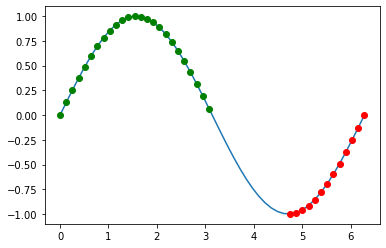

In [43]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 *np.pi, 50)
y = np.sin(x)
plt.plot(x, y)

mask = y >= 0
print(len(x[mask]))
plt.plot(x[mask], y[mask], 'go')

mask = np.logical_and(y <= 0, x >= np.pi / 2 * 3)
plt.plot(x[mask], y[mask], 'ro')

## 数组迭代
除了for，Numpy还提供另一种更为优雅的遍历方法
- `apply_along_axis(fuinc1d, axis, arr)` 根据给定的函数处理给定的轴（0表示列，1表示行）

In [46]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.apply_along_axis(np.sum, 0, x)
print(y)  # [105 110 115 120 125]
y = np.apply_along_axis(np.sum, 1, x)
print(y)  # [ 65  90 115 140 165]

y = np.apply_along_axis(np.mean, 0, x)
print(y)  # [21. 22. 23. 24. 25.]
y = np.apply_along_axis(np.mean, 1, x)
print(y)  # [13. 18. 23. 28. 33.]

y = np.apply_along_axis(lambda x : (x[0] + x[-1]) * 0.5, 0, x)
print(y) # [21. 22. 23. 24. 25.]

[105 110 115 120 125]
[ 65  90 115 140 165]
[21. 22. 23. 24. 25.]
[13. 18. 23. 28. 33.]
[21. 22. 23. 24. 25.]


## 练习
- 1.交换数组arr中的行列

In [65]:
arr = np.arange(9).reshape(3, 3)
x = arr[:, [2, 1, 0]]
print(x)

arr = np.random.randint(1, 10, (3, 3))
print(arr, arr[[2, 1, 0], :], sep = '\n\n')
# [[1 4 5]
#  [3 4 7]
#  [4 2 4]]

# [[4 2 4]
#  [3 4 7]
#  [1 4 5]]

[[2 1 0]
 [5 4 3]
 [8 7 6]]
[[1 8 8]
 [7 8 2]
 [5 1 1]]

[[5 1 1]
 [7 8 2]
 [1 8 8]]


- 2.反转二维数组arr的行列

In [71]:
x = np.arange(9).reshape(3, 3)
print(x)
# [[0 1 2]
#  [3 4 5]
#  [6 7 8]]

print(x[::-1,:])
# [[6 7 8]
#  [3 4 5]
#  [0 1 2]]

print(x[:,::-1])
# [[2 1 0]
#  [5 4 3]
#  [8 7 6]]

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[6 7 8]
 [3 4 5]
 [0 1 2]]
[[2 1 0]
 [5 4 3]
 [8 7 6]]
